<a href="https://colab.research.google.com/github/springboardmentor891v/CreditPathAI/blob/Rajath/notebooks/loan_default_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('../Loan_Default.csv')

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [3]:

print("Data Shape:")
print(df.shape)
print("\nData Info:")
df.info()

Data Shape:
(148670, 34)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float

In [4]:

df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


 cleaning up the data

In [5]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                     

In [6]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()

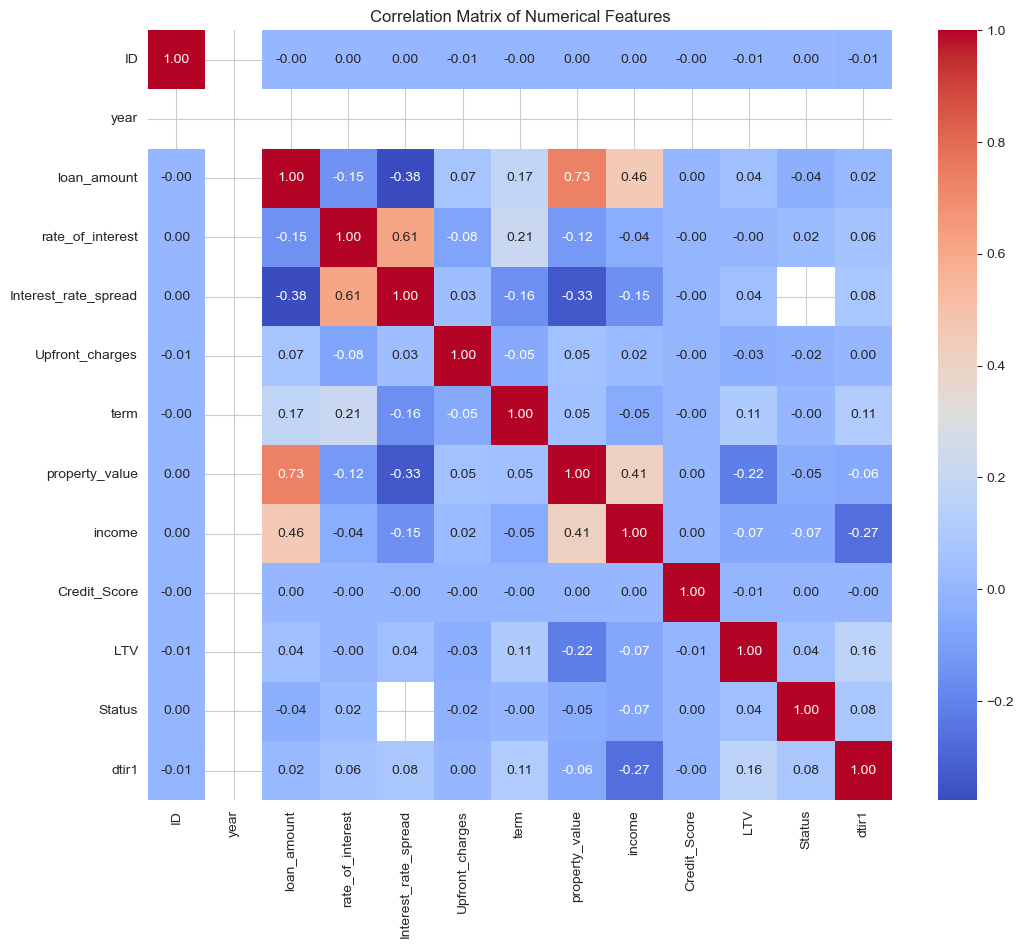

In [7]:

correlation_matrix = df[numerical_col].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:

df.head()

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,...,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [10]:
df = df.drop(columns=['id', 'year'])

In [11]:
df.columns

Index(['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'secured_by', 'total_units', 'income', 'credit_type',
       'credit_score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'ltv', 'region', 'security_type', 'status',
       'dtir1'],
      dtype='object')

In [12]:
df['has_co_applicant'] = df['co-applicant_credit_type'].notna().astype(int)
df = df.drop(columns=['co-applicant_credit_type'])

In [13]:
df.columns

Index(['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'secured_by', 'total_units', 'income', 'credit_type',
       'credit_score', 'age', 'submission_of_application', 'ltv', 'region',
       'security_type', 'status', 'dtir1', 'has_co_applicant'],
      dtype='object')

In [14]:
df.head()

,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,credit_score,age,submission_of_application,ltv,region,security_type,status,dtir1,has_co_applicant
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,EXP,758,25-34,to_inst,98.728814,south,direct,1,45.0,1
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,EQUI,552,55-64,to_inst,NaN,North,direct,1,NaN,1
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,...,EXP,834,35-44,to_inst,80.019685,south,direct,0,46.0,1
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,...,EXP,587,45-54,not_inst,69.376900,North,direct,0,42.0,1
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,...,CRIF,602,25-34,not_inst,91.886544,North,direct,0,39.0,1


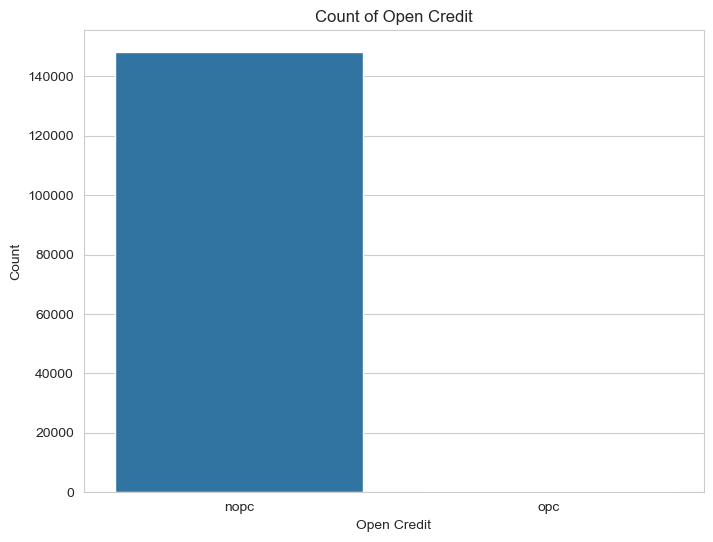

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='open_credit', data=df)
plt.title('Count of Open Credit')
plt.xlabel('Open Credit')
plt.ylabel('Count')
plt.show()

In [16]:
columns_to_check = [
    'open_credit', 'loan_limit', 'approv_in_adv', 'credit_worthiness',
    'business_or_commercial', 'neg_ammortization', 'interest_only',
    'lump_sum_payment', 'construction_type', 'secured_by',
    'submission_of_application', 'security_type'
]

for col in columns_to_check:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print("\n" + "="*30 + "\n")

Value counts for 'open_credit':
open_credit
nopc    148114
opc        556
Name: count, dtype: int64


Value counts for 'loan_limit':
loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64


Value counts for 'approv_in_adv':
approv_in_adv
nopre    124621
pre       23141
Name: count, dtype: int64


Value counts for 'credit_worthiness':
credit_worthiness
l1    142344
l2      6326
Name: count, dtype: int64


Value counts for 'business_or_commercial':
business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64


Value counts for 'neg_ammortization':
neg_ammortization
not_neg    133420
neg_amm     15129
Name: count, dtype: int64


Value counts for 'interest_only':
interest_only
not_int     141560
int_only      7110
Name: count, dtype: int64


Value counts for 'lump_sum_payment':
lump_sum_payment
not_lpsm    145286
lpsm          3384
Name: count, dtype: int64


Value counts for 'construction_type':
construction_type
sb    148637
mh        33
Name: count, dtype: 

In [17]:
df.columns

Index(['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'secured_by', 'total_units', 'income', 'credit_type',
       'credit_score', 'age', 'submission_of_application', 'ltv', 'region',
       'security_type', 'status', 'dtir1', 'has_co_applicant'],
      dtype='object')

In [18]:
df.drop(columns=['open_credit'], inplace=True)

In [19]:
df.columns


Index(['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'business_or_commercial', 'loan_amount',
       'rate_of_interest', 'interest_rate_spread', 'upfront_charges', 'term',
       'neg_ammortization', 'interest_only', 'lump_sum_payment',
       'property_value', 'construction_type', 'occupancy_type', 'secured_by',
       'total_units', 'income', 'credit_type', 'credit_score', 'age',
       'submission_of_application', 'ltv', 'region', 'security_type', 'status',
       'dtir1', 'has_co_applicant'],
      dtype='object')

In [20]:
df['status'].value_counts()

status
0    112031
1     36639
Name: count, dtype: int64

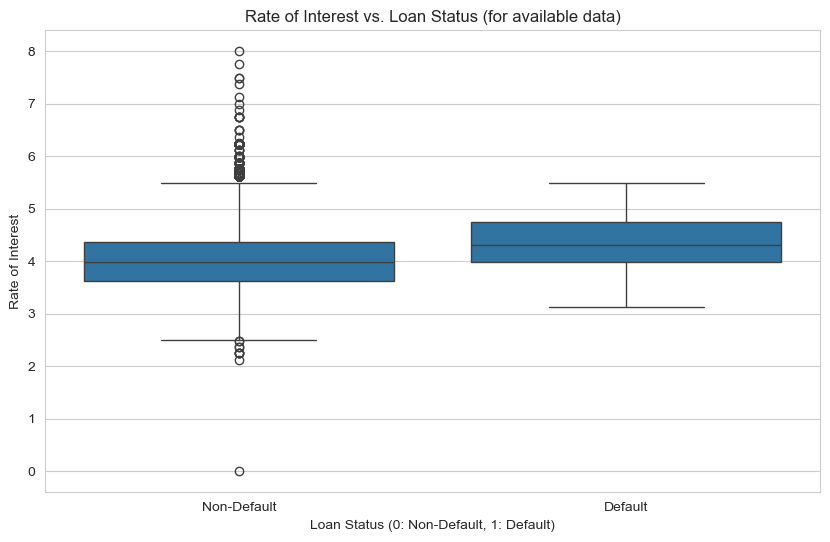

In [21]:
# Creating  a temporary dataframe with only the columns that are needed  for this analysis
temp_df = df[['rate_of_interest', 'status']].copy()


temp_df.dropna(subset=['rate_of_interest'], inplace=True)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='rate_of_interest', data=temp_df)
plt.title('Rate of Interest vs. Loan Status (for available data)')
plt.xlabel('Loan Status (0: Non-Default, 1: Default)')
plt.ylabel('Rate of Interest')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.show()

In [22]:
# Create indicator column
df['rate_of_interest_was_missing'] = df['rate_of_interest'].isnull().astype(int)

# Calculate median and impute missing values
median_rate_of_interest = df['rate_of_interest'].median()
df['rate_of_interest'].fillna(median_rate_of_interest, inplace=True)

C:\Users\pavan\AppData\Local\Temp\ipykernel_3260\2042999552.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate_of_interest'].fillna(median_rate_of_interest, inplace=True)


In [23]:
# Verify the changes
print("Missing values after imputation:")
print(df[['rate_of_interest', 'rate_of_interest_was_missing']].isnull().sum())

print("\nValue counts for 'rate_of_interest_was_missing':")
print(df['rate_of_interest_was_missing'].value_counts())

print("\nFirst 5 rows showing the updated columns:")
display(df[['rate_of_interest', 'rate_of_interest_was_missing']].head())

Missing values after imputation:
rate_of_interest                0
rate_of_interest_was_missing    0
dtype: int64

Value counts for 'rate_of_interest_was_missing':
rate_of_interest_was_missing
0    112231
1     36439
Name: count, dtype: int64

First 5 rows showing the updated columns:


,rate_of_interest,rate_of_interest_was_missing
0,3.99,1
1,3.99,1
2,4.56,0
3,4.25,0
4,4.00,0


In [24]:
print(df.isnull().sum())

loan_limit                       3344
gender                              0
approv_in_adv                     908
loan_type                           0
loan_purpose                      134
credit_worthiness                   0
business_or_commercial              0
loan_amount                         0
rate_of_interest                    0
interest_rate_spread            36639
upfront_charges                 39642
term                               41
neg_ammortization                 121
interest_only                       0
lump_sum_payment                    0
property_value                  15098
construction_type                   0
occupancy_type                      0
secured_by                          0
total_units                         0
income                           9150
credit_type                         0
credit_score                        0
age                               200
submission_of_application         200
ltv                             15098
region      

In [25]:
print(df.shape)
print(df.columns)

(148670, 32)
Index(['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'business_or_commercial', 'loan_amount',
       'rate_of_interest', 'interest_rate_spread', 'upfront_charges', 'term',
       'neg_ammortization', 'interest_only', 'lump_sum_payment',
       'property_value', 'construction_type', 'occupancy_type', 'secured_by',
       'total_units', 'income', 'credit_type', 'credit_score', 'age',
       'submission_of_application', 'ltv', 'region', 'security_type', 'status',
       'dtir1', 'has_co_applicant', 'rate_of_interest_was_missing'],
      dtype='object')


In [26]:
# Create indicator column for dtir1
df['dtir1_was_missing'] = df['dtir1'].isnull().astype(int)


median_dtir1 = df['dtir1'].median()
df['dtir1'].fillna(median_dtir1, inplace=True)

C:\Users\pavan\AppData\Local\Temp\ipykernel_3260\3987037440.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dtir1'].fillna(median_dtir1, inplace=True)


In [27]:
# Verify the changes for dtir1
print("Missing values after imputation for dtir1:")
print(df[['dtir1', 'dtir1_was_missing']].isnull().sum())

print("\nValue counts for 'dtir1_was_missing':")
print(df['dtir1_was_missing'].value_counts())

print("\nFirst 5 rows showing the updated dtir1 columns:")
display(df[['dtir1', 'dtir1_was_missing']].head())

Missing values after imputation for dtir1:
dtir1                0
dtir1_was_missing    0
dtype: int64

Value counts for 'dtir1_was_missing':
dtir1_was_missing
0    124549
1     24121
Name: count, dtype: int64

First 5 rows showing the updated dtir1 columns:


,dtir1,dtir1_was_missing
0,45.0,0
1,39.0,1
2,46.0,0
3,42.0,0
4,39.0,0


In [28]:
columns_to_check = [
    'ltv', 'age', 'submission_of_application', 'income', 'property_value',
    'neg_ammortization', 'term', 'loan_purpose', 'approv_in_adv', 'loan_limit'
]
#to check the datatypes of the columns
print("Data types of the specified columns:")
for col in columns_to_check:
    if col in df.columns:
        print(f"{col}: {df[col].dtype}")
    else:
        print(f"{col}: Column not found")

Data types of the specified columns:
ltv: float64
age: object
submission_of_application: object
income: float64
property_value: float64
neg_ammortization: object
term: float64
loan_purpose: object
approv_in_adv: object
loan_limit: object


In [29]:
numerical_cols_to_impute = ['ltv', 'income', 'property_value', 'term']

for col in numerical_cols_to_impute:
    if col in df.columns and df[col].dtype in ['float64', 'int64']:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Imputed missing values in '{col}' with median: {median_value}")
    else:
        print(f"Column '{col}' not found or is not numerical.")

print("\nMissing values after imputation for specified numerical columns:")
print(df[numerical_cols_to_impute].isnull().sum())

Imputed missing values in 'ltv' with median: 75.13586957
Imputed missing values in 'income' with median: 5760.0
Imputed missing values in 'property_value' with median: 418000.0
Imputed missing values in 'term' with median: 360.0

Missing values after imputation for specified numerical columns:
ltv               0
income            0
property_value    0
term              0
dtype: int64


C:\Users\pavan\AppData\Local\Temp\ipykernel_3260\2361827045.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [30]:
categorical_cols_to_impute = [
    'loan_limit', 'approv_in_adv', 'loan_purpose', 'neg_ammortization',
    'age', 'submission_of_application'
]

for col in categorical_cols_to_impute:
    if col in df.columns and df[col].dtype == 'object':
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Imputed missing values in '{col}' with mode: {mode_value}")
    else:
        print(f"Column '{col}' not found or is not categorical.")

print("\nMissing values after imputation for specified categorical columns:")
print(df[categorical_cols_to_impute].isnull().sum())

Imputed missing values in 'loan_limit' with mode: cf


C:\Users\pavan\AppData\Local\Temp\ipykernel_3260\123870205.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


Imputed missing values in 'approv_in_adv' with mode: nopre
Imputed missing values in 'loan_purpose' with mode: p3
Imputed missing values in 'neg_ammortization' with mode: not_neg
Imputed missing values in 'age' with mode: 45-54
Imputed missing values in 'submission_of_application' with mode: to_inst

Missing values after imputation for specified categorical columns:
loan_limit                   0
approv_in_adv                0
loan_purpose                 0
neg_ammortization            0
age                          0
submission_of_application    0
dtype: int64


In [31]:
print(df.isnull().sum())

loan_limit                          0
gender                              0
approv_in_adv                       0
loan_type                           0
loan_purpose                        0
credit_worthiness                   0
business_or_commercial              0
loan_amount                         0
rate_of_interest                    0
interest_rate_spread            36639
upfront_charges                 39642
term                                0
neg_ammortization                   0
interest_only                       0
lump_sum_payment                    0
property_value                      0
construction_type                   0
occupancy_type                      0
secured_by                          0
total_units                         0
income                              0
credit_type                         0
credit_score                        0
age                                 0
submission_of_application           0
ltv                                 0
region      

In [32]:

numerical_col = df.select_dtypes(include=np.number).columns.tolist()


print("Descriptive statistics for numerical columns:")
display(df[numerical_col].describe())

Descriptive statistics for numerical columns:


,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1,has_co_applicant,rate_of_interest_was_missing,dtir1_was_missing
count,1.486700e+05,148670.000000,112031.000000,109028.000000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.0,148670.000000,148670.000000
mean,3.311177e+05,4.031879,0.441656,3224.996127,335.143438,4.897800e+05,6883.647811,699.789103,72.989111,0.246445,37.938508,1.0,0.245100,0.162245
std,1.839093e+05,0.488348,0.513043,3251.121510,58.402488,3.420221e+05,6300.067060,115.875857,37.890714,0.430942,9.663417,0.0,0.430148,0.368677
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000,1.0,0.000000,0.000000
25%,1.965000e+05,3.750000,0.076000,581.490000,360.000000,2.880000e+05,3840.000000,599.000000,63.297872,0.000000,33.000000,1.0,0.000000,0.000000
50%,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000,1.0,0.000000,0.000000
75%,4.365000e+05,4.250000,0.775400,4812.500000,360.000000,5.980000e+05,8280.000000,800.000000,84.722222,0.000000,44.000000,1.0,0.000000,0.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000,1.0,1.000000,1.000000


In [33]:
df.columns

Index(['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'business_or_commercial', 'loan_amount',
       'rate_of_interest', 'interest_rate_spread', 'upfront_charges', 'term',
       'neg_ammortization', 'interest_only', 'lump_sum_payment',
       'property_value', 'construction_type', 'occupancy_type', 'secured_by',
       'total_units', 'income', 'credit_type', 'credit_score', 'age',
       'submission_of_application', 'ltv', 'region', 'security_type', 'status',
       'dtir1', 'has_co_applicant', 'rate_of_interest_was_missing',
       'dtir1_was_missing'],
      dtype='object')

In [34]:
'''used the  simple median imputation combined with a missing indicator to handle the missing vlaue ,
  but it's casuing an accuracy of 100%  . so decided to drop the columns . '''

columns_to_drop = [
    'rate_of_interest_was_missing',
    'dtir1_was_missing'
]

print(f"Dropping leaky columns: {columns_to_drop}")
df_clean = df.drop(columns=columns_to_drop)


Dropping leaky columns: ['rate_of_interest_was_missing', 'dtir1_was_missing']


In [35]:

X = df_clean.drop('status', axis=1)
y = df_clean['status']


In [36]:
#  Split the data into training and testing sets ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\n--- Step 2: Data Splitting ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}\n")


--- Step 2: Data Splitting ---
X_train shape: (118936, 30)
X_test shape: (29734, 30)



In [37]:
# : Handle Missing Values (Imputation) ---


numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()


num_imputer = SimpleImputer(strategy='median')

X_train_imputed = X_train.copy()
X_test_imputed = X_test.copy()
X_train_imputed[numerical_cols] = num_imputer.fit_transform(X_train[numerical_cols])
X_test_imputed[numerical_cols] = num_imputer.transform(X_test[numerical_cols])


cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])
X_test_imputed[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])

print("--- Step 2: Missing Value Imputation ---")
print("Missing values handled correctly before other steps.\n")

--- Step 2: Missing Value Imputation ---
Missing values handled correctly before other steps.



In [38]:
# One-Hot Encode
#for the Categorical Features

X_train_encoded = pd.get_dummies(X_train_imputed, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_imputed, columns=categorical_cols, drop_first=True)


X_train_aligned, X_test_aligned = X_train_encoded.align(X_test_encoded, join='inner', axis=1, fill_value=0)

print("--- Step 3: One-Hot Encoding ---")
print(f"X_train_aligned shape: {X_train_aligned.shape}")
print(f"X_test_aligned shape: {X_test_aligned.shape}\n")

--- Step 3: One-Hot Encoding ---
X_train_aligned shape: (118936, 47)
X_test_aligned shape: (29734, 47)



In [39]:
#  Scale Numerical Features ---

scaler = StandardScaler()


X_train_aligned[numerical_cols] = scaler.fit_transform(X_train_aligned[numerical_cols])
X_test_aligned[numerical_cols] = scaler.transform(X_test_aligned[numerical_cols])

print("--- Step 4: Feature Scaling ---")
print("Scaling applied only to the original numerical columns.\n")

--- Step 4: Feature Scaling ---
Scaling applied only to the original numerical columns.



In [40]:

smote = SMOTE(random_state=42)
print(f"Original training class distribution:\n{y_train.value_counts()}")
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_aligned, y_train)
print(f"\nResampled training class distribution:\n{y_train_resampled.value_counts()}\n")

Original training class distribution:
status
0    89625
1    29311
Name: count, dtype: int64

Resampled training class distribution:
status
0    89625
1    89625
Name: count, dtype: int64



In [41]:
# - Train and Evaluate Models ---
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb


models = {

    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),

    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
   # "Support Vector Classifier (SVC)": SVC(random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),

    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

# Clean up column names for XGBoost
X_train_resampled.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train_resampled.columns]
X_test_aligned.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test_aligned.columns]


# Train and evaluate each model
for name, model in models.items():
    print(f"--- Training and Evaluating {name} ---")
    # Train on the fully prepared training data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on the fully prepared test data
    y_pred = model.predict(X_test_aligned)

    # Evaluate the results
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


--- Training and Evaluating Logistic Regression ---
Accuracy: 0.8328
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     22406
           1       0.65      0.71      0.68      7328

    accuracy                           0.83     29734
   macro avg       0.77      0.79      0.78     29734
weighted avg       0.84      0.83      0.84     29734

--- Training and Evaluating Random Forest ---
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734

--- Training and Evaluating XGBoost ---


c:\Users\pavan\.conda\envs\project1\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:43:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9999
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734

--- Training and Evaluating Gradient Boosting ---
Accuracy: 0.9999
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734

--- Training and Evaluating K-Nearest Neighbors (KNN) ---
Accuracy: 0.9128
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     22406
         

--- Confusion Matrix and Metrics for Logistic Regression ---


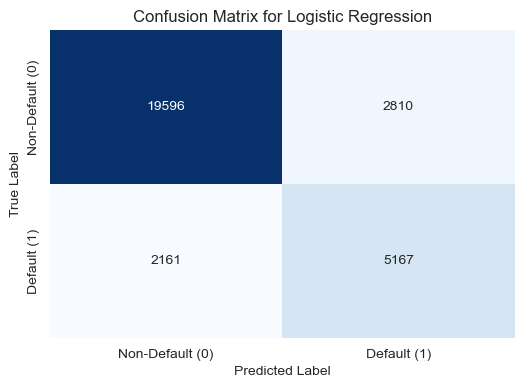

Accuracy: 0.8328
Recall: 0.7051
Precision: 0.6477


--- Confusion Matrix and Metrics for Random Forest ---


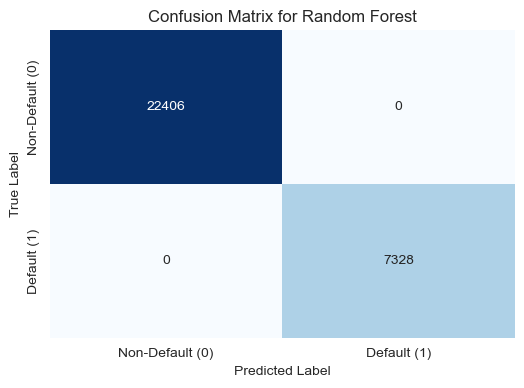

Accuracy: 1.0000
Recall: 1.0000
Precision: 1.0000


--- Confusion Matrix and Metrics for XGBoost ---


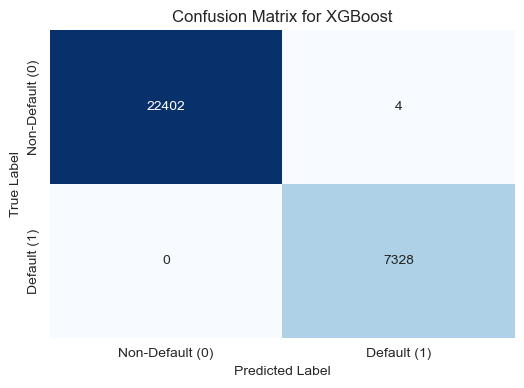

Accuracy: 0.9999
Recall: 1.0000
Precision: 0.9995


--- Confusion Matrix and Metrics for Gradient Boosting ---


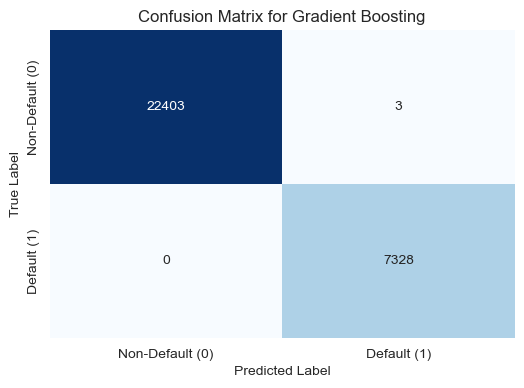

Accuracy: 0.9999
Recall: 1.0000
Precision: 0.9996


--- Confusion Matrix and Metrics for K-Nearest Neighbors (KNN) ---


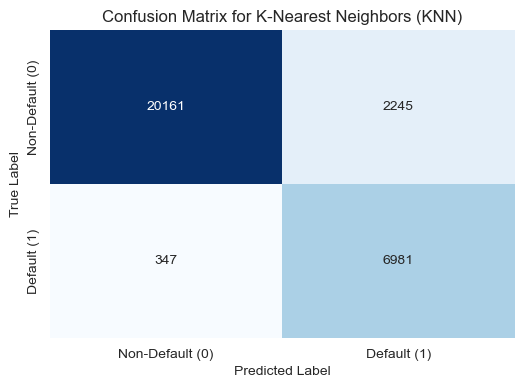

Accuracy: 0.9128
Recall: 0.9526
Precision: 0.7567


--- Confusion Matrix and Metrics for AdaBoost ---


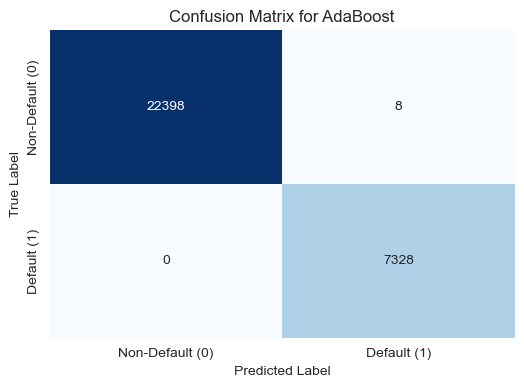

Accuracy: 0.9997
Recall: 1.0000
Precision: 0.9989


--- Confusion Matrix and Metrics for Gaussian Naive Bayes ---


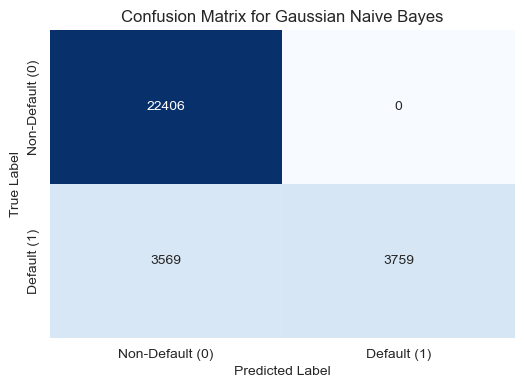

Accuracy: 0.8800
Recall: 0.5130
Precision: 1.0000


--- Confusion Matrix and Metrics for LightGBM ---


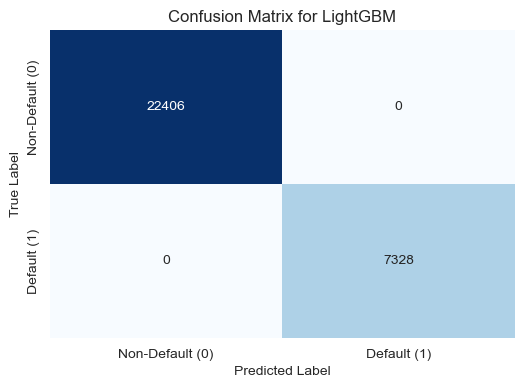

Accuracy: 1.0000
Recall: 1.0000
Precision: 1.0000




In [42]:
from sklearn.metrics import confusion_matrix

# Plot confusion matrix for each model and calculate metrics
for name, model in models.items():
    print(f"--- Confusion Matrix and Metrics for {name} ---")

    # Predict on the fully prepared test data
    y_pred = model.predict(X_test_aligned)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Non-Default (0)', 'Default (1)'],
                yticklabels=['Non-Default (0)', 'Default (1)'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


    # [[TN, FP],
    #  [FN, TP]]
    TN, FP, FN, TP = cm.ravel()

    # Calculate Accuracy
    accuracy = (TN + TP) / (TN + FP + FN + TP)

    # Calculate Recall (Sensitivity or True Positive Rate)
    recall = TP / (TP + FN)

    # Calculate Precision (Positive Predictive Value)
    # Add a check to avoid division by zero if FP + TP is 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print("\n" + "="*30 + "\n")

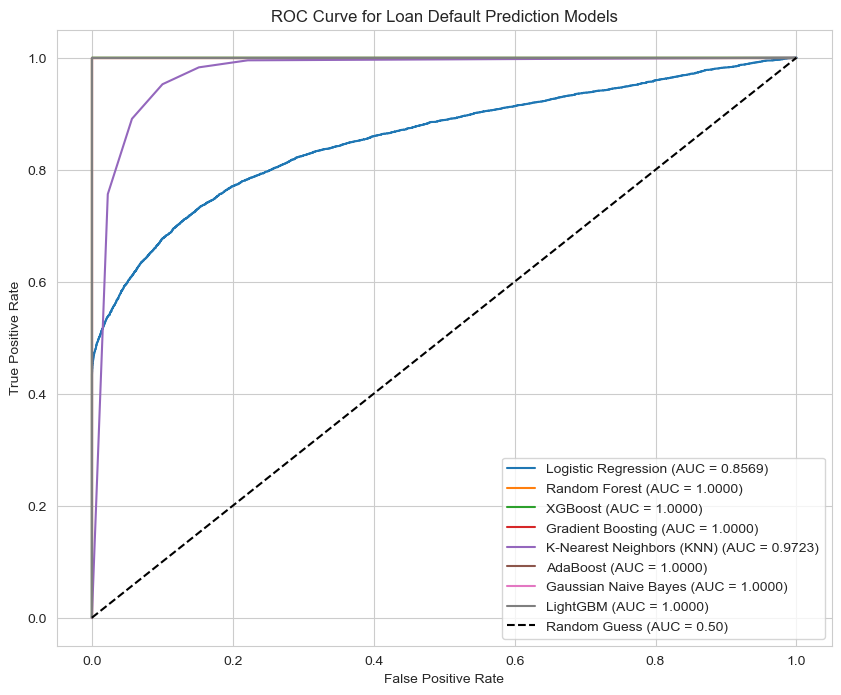

In [43]:
from sklearn.metrics import roc_curve, auc

# Plot ROC-AUC curve for each model
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Get the predicted probabilities for the positive class
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_aligned)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test_aligned)
    else:
        # Some models like SVM with kernel='linear' or 'precomputed' might not have predict_proba
        print(f"Model {name} does not support probability prediction or decision function.")
        continue

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Loan Default Prediction Models')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

# This list will store the results for our final summary table.
results_list = []

# --- Step 2: Train Each Model and Evaluate on the Test Set ---
print("--- Starting Final Evaluation on the Unseen Test Data ---")
for name, model in models.items():
    print(f"\n--- Evaluating: {name} ---")

    # Make predictions on the unseen test data (using the already prepared X_test_aligned)
    y_pred = model.predict(X_test_aligned)

    # --- Generate and Print Full Reports ---
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nAccuracy: {accuracy:.4f} ")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report (for test data):")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

    # Store results in the list
    results_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })

print("\n--- Final Evaluation Complete ---")

# You can now convert results_list to a DataFrame for easy viewing
results_df = pd.DataFrame(results_list)
display(results_df.sort_values(by='F1-score', ascending=False))

--- Starting Final Evaluation on the Unseen Test Data ---

--- Evaluating: Logistic Regression ---

Accuracy: 0.8328 
Precision: 0.6477
Recall: 0.7051
F1-score: 0.6752

Confusion Matrix:
[[19596  2810]
 [ 2161  5167]]

Classification Report (for test data):
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     22406
           1       0.65      0.71      0.68      7328

    accuracy                           0.83     29734
   macro avg       0.77      0.79      0.78     29734
weighted avg       0.84      0.83      0.84     29734

--------------------------------------------------

--- Evaluating: Random Forest ---

Accuracy: 1.0000 
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Confusion Matrix:
[[22406     0]
 [    0  7328]]

Classification Report (for test data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    ac

,Model,Accuracy,Precision,Recall,F1-score
1,Random Forest,1.000000,1.000000,1.000000,1.000000
7,LightGBM,1.000000,1.000000,1.000000,1.000000
3,Gradient Boosting,0.999899,0.999591,1.000000,0.999795
2,XGBoost,0.999865,0.999454,1.000000,0.999727
5,AdaBoost,0.999731,0.998909,1.000000,0.999454
4,K-Nearest Neighbors (KNN),0.912827,0.756666,0.952647,0.843422
6,Gaussian Naive Bayes,0.879969,1.000000,0.512964,0.678091
0,Logistic Regression,0.832818,0.647737,0.705104,0.675204
